<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [4]:
#reading in the CSV
import pandas as pd
df = pd.read_csv('https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip', compression = 'zip', skiprows = 1, skipfooter = 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [6]:
#making sure I did it right for this data set
print(df.shape)
df.head()

(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,...,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,...,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9025.41,9025.41,2822.600000,2822.60,...,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13271.86,13271.86,6236.010000,6236.01,...,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3014.03,3014.03,1291.210000,1291.21,...,0.0,0,0,221310,71375,12300,77865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)

In [11]:
#lets take a look at the missing data
pd.options.display.max_rows=999
pd.options.display.max_columns=100
df.isnull().sum().sort_values(ascending = False)

id                                            128412
desc                                          128412
member_id                                     128412
url                                           128412
orig_projected_additional_accrued_interest    128283
hardship_type                                 128276
hardship_last_payment_amount                  128276
hardship_payoff_balance_amount                128276
hardship_reason                               128276
hardship_loan_status                          128276
hardship_dpd                                  128276
hardship_length                               128276
payment_plan_start_date                       128276
hardship_end_date                             128276
hardship_start_date                           128276
hardship_amount                               128276
deferral_term                                 128276
hardship_status                               128276
settlement_percentage                         

In [12]:
#column that shouldn't be a string.
df['int_rate'].head()

0     14.47%
1     22.35%
2     23.40%
3     18.94%
4     10.72%
Name: int_rate, dtype: object

In [13]:
#what is the datatype of the column
df['int_rate'].dtype

dtype('O')

In [14]:
#what is the value of the first cell in this column
int_rate0 = df.loc[0, 'int_rate']
print(int_rate0)
int_rate0

 14.47%


' 14.47%'

In [15]:
#stripping the leading space and the percentage
int_rate0.strip().strip('%')

'14.47'

In [16]:
#converting to float
float(int_rate0.strip().strip('%'))

14.47

In [17]:
#confirming that will confirt from str to float
print(type(int_rate0.strip().strip('%')))
print(type(float(int_rate0.strip().strip('%'))))

<class 'str'>
<class 'float'>


In [0]:
#lets make this a function
def int_rate_2_float(mystring):
  return float(mystring.strip().strip('%'))

In [19]:
#Applying it to the whole column
df['int_rate_float'] = df['int_rate'].apply(int_rate_2_float)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_float'],
      dtype='object', length=145)

In [20]:
df[['int_rate', 'int_rate_float']].head()

,int_rate,int_rate_float
0,14.47%,14.47
1,22.35%,22.35
2,23.40%,23.40
3,18.94%,18.94
4,10.72%,10.72


In [21]:
#exploring the emp_tilte column
df[['emp_title', 'int_rate']].sample(6)

,emp_title,int_rate
87367,Cna,15.02%
105329,Truck Driver,11.06%
100998,Technical Operations Supervisor,6.11%
63598,Work Supervisor,7.56%
119834,Office Manager,8.46%
70743,Administrator,8.19%


In [22]:
#how many unique possible titles?
df['emp_title'].nunique()

43892

In [23]:
#most popular titles
df['emp_title'].value_counts(ascending=False, dropna=False).head()

NaN                 20947
Teacher              2090
Manager              1773
Registered Nurse      952
Driver                924
Name: emp_title, dtype: int64

In [24]:
#hella nulls
df['emp_title'].isnull().sum()

20947

In [25]:
#how many are not null
df['emp_title'].notnull().sum()

107465

In [29]:
#Lets start cleaning it up
import numpy as np

def clean_title(title):
  if isinstance(title, str):
    return title.strip().title() #note to self .title() method
  else:
    return 'Unkown'

#examples for testing this function
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

for item in examples:
  print(clean_title(item))

Owner
Supervisor
Project Manager
Unkown


In [30]:
#function appears to be working, lets apply it to the entire column
df['emp_title_clean'] = df['emp_title'].apply(clean_title)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_last_payment_amount', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'int_rate_float', 'emp_title_clean'],
      dtype='object', length=146)

In [31]:
#compare old and new values
df[['emp_title', 'emp_title_clean']].sample(6)

,emp_title,emp_title_clean
108496,Meat cutter,Meat Cutter
91763,Mnt. Coordinator,Mnt. Coordinator
86815,Asst. Controller,Asst. Controller
4371,Receptionist,Receptionist
36518,Shop foreman,Shop Foreman
104920,"Electrical Engineer, Principal","Electrical Engineer, Principal"


In [32]:
#lets check if there are any missing
df['emp_title_clean'].isnull().sum()

0

In [33]:
#lets check the value counts
df['emp_title_clean'].value_counts(ascending=False).head()

Unkown              20947
Teacher              2557
Manager              2395
Registered Nurse     1418
Driver               1258
Name: emp_title_clean, dtype: int64

In [35]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_float',
       'emp_title_clean', 'emp_title_manager'],
      dtype='object', length=147)

In [36]:
#alright lets compart the clean title and the manager title
df[['emp_title_clean', 'emp_title_manager']].sample(4)

,emp_title_clean,emp_title_manager
5961,Manager,False
90031,Unkown,NaN
108422,Plants Technician,False
81146,Unkown,NaN


In [37]:
#okay looks like there is some nan values, but it seems to be correlated to the unkown.  Is this expected? Earmark to ask TL
df['emp_title_manager'].isnull().sum()

20947

In [38]:
#do we have any dates in our df?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128412 entries, 0 to 128411
Columns: 147 entries, id to emp_title_manager
dtypes: float64(58), int64(51), object(38)
memory usage: 144.0+ MB


In [39]:
#lets do it like a pro, and use that list comprehension
[col for col in df.columns if (col.endswith('_d')) or (col.endswith('_date'))]

['issue_d',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'debt_settlement_flag_date',
 'settlement_date']

In [40]:
#what is the data type
df['issue_d'].dtype

dtype('O')

In [41]:
#but sure looks like a date
df.loc[0:10, 'issue_d']

0     Dec-2018
1     Dec-2018
2     Dec-2018
3     Dec-2018
4     Dec-2018
5     Dec-2018
6     Dec-2018
7     Dec-2018
8     Dec-2018
9     Dec-2018
10    Dec-2018
Name: issue_d, dtype: object

In [42]:
df['issue_d_clean'] = pd.to_datetime(df['issue_d'], infer_datetime_format = True)

#compare the old and new
df[['issue_d', 'issue_d_clean']].head()

,issue_d,issue_d_clean
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01


In [43]:
#checking the data type
df['issue_d_clean'].dtype

dtype('<M8[ns]')

In [44]:
#lets create a few new values
df['year'] = df['issue_d_clean'].dt.year

df[['issue_d_clean', 'year']].sample(6)

,issue_d_clean,year
60006,2018-11-01,2018
39748,2018-11-01,2018
44144,2018-11-01,2018
94787,2018-10-01,2018
19910,2018-12-01,2018
17587,2018-12-01,2018


In [47]:
#some more
df['month'] = df['issue_d_clean'].dt.month

#compare
df[['issue_d_clean', 'year']].sample(6)

,issue_d_clean,year
101184,2018-10-01,2018
56810,2018-11-01,2018
25969,2018-12-01,2018
31866,2018-12-01,2018
127787,2018-10-01,2018
55852,2018-11-01,2018


In [48]:
#dj khalid
df['weekday'] = df['issue_d_clean'].dt.month

#compare
df[['issue_d_clean', 'weekday']].sample(6)

,issue_d_clean,weekday
123740,2018-10-01,10
11550,2018-12-01,12
26738,2018-12-01,12
5214,2018-12-01,12
17125,2018-12-01,12
12156,2018-12-01,12


In [49]:
#lets filter on some bools
condition = df['emp_title_manager'] == True

managers = df[condition]
managers.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_clean,emp_title_manager,issue_d_clean,year,month,weekday
9,NaN,NaN,10450,10450,10450.0,36 months,18.94%,382.74,D,D2,Project Manager,10+ years,MORTGAGE,70000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,371xx,TN,27.38,0,Jul-2007,0,NaN,NaN,11,0,34628,87%,24,w,8361.33,8361.33,3439.170000,3439.17,2088.67,1350.50,0.0,0.0,0.0,Oct-2019,382.74,Nov-2019,Oct-2019,0,...,0,1,100.0,100.0,0,0,429450,41288,11800,17500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94,Project Manager,True,2018-12-01,2018,12,12
27,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,...,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,Production Manager,True,2018-12-01,2018,12,12
40,NaN,NaN,12000,12000,12000.0,36 months,16.14%,422.72,C,C4,Sales Account Manager,4 years,RENT,70000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,18.96,0,Nov-2013,0,NaN,NaN,6,0,13663,61.8%,7,w,9555.15,9555.15,3788.340000,3788.34,2444.85,1343.49,0.0,0.0,0.0,Oct-2019,422.72,Nov-2019,Oct-2019,0,...,0,2,100.0,66.7,0,0,56264,34470,18500,34164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,Sales Account Manager,True,2018-12-01,2018,12,12
42,NaN,NaN,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,36266.741552,36266.74,35000.00,1266.74,0.0,0.0,0.0,Apr-2019,34712.60,NaN,Oct-2019,0,...,0,1,97.4,66.7,0,0,516204,82514,59700,51904,88364.0,Sep-1985,0.0,6.0,19.0,53.4,2.0,29.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,Sr. Vice President -Risk Manager,True,2018-12-01,2018,12,12
46,NaN,NaN,20400,20400,20400.0,60 months,10.33%,436.76,B,B1,Bakery Manager,10+ years,MORTGAGE,140000.0,Not 

In [50]:
#this doesn't make the most sense to me.  What does condition look like?
condition.head()

0    False
1    False
2    False
3    False
4    False
Name: emp_title_manager, dtype: bool

In [0]:
#okay that is what I expected condition to look like. Basically a single column dataframe titled emp_title_manager
#so when I do managers = df[condition] I'm replacing the original column with the new column

In [51]:
managers['emp_title_manager'].isnull().sum()

0

In [53]:
#got it, I understand now.
df['emp_title_manager'].isnull().sum()

20947

In [54]:
#lets do two filters at once
subordinates = df[(df['emp_title_manager'] == False) & (df['home_ownership']=='OWN')]

subordinates.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_clean,emp_title_manager,issue_d_clean,year,month,weekday
24,NaN,NaN,30000,30000,30000.0,60 months,26.31%,903.73,E,E4,Casino Host,10+ years,OWN,62000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,920xx,CA,37.24,0,Oct-2007,0,NaN,86.0,15,1,18890,39.8%,36,w,0.00,0.00,2645.41,2645.41,754.24,1891.17,0.0,0.0,0.0,Apr-2019,903.73,NaN,Oct-2019,0,...,0,1,100.0,14.3,1,0,138354,104590,36400,90854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,26.31,Casino Host,False,2018-12-01,2018,12,12
41,NaN,NaN,1200,1200,1200.0,36 months,17.97%,43.37,D,D1,Haz Mat S/R,10+ years,OWN,52000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,vacation,Vacation,605xx,IL,25.61,0,Feb-1991,2,NaN,NaN,14,0,18197,48.3%,24,w,928.18,928.18,431.90,431.90,271.82,160.08,0.0,0.0,0.0,Oct-2019,43.37,Nov-2019,Oct-2019,0,...,0,3,100.0,66.7,0,0,50041,29964,15700,12341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,Haz Mat S/R,False,2018-12-01,2018,12,12
47,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15280.46,15280.46,6792.87,6792.87,4719.54,2073.33,0.0,0.0,0.0,Oct-2019,688.13,Nov-2019,Oct-2019,0,...,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,Bus Driver,False,2018-12-01,2018,12,12
65,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.05,5848.05,3024.11,2823.94,0.0,0.0,0.0,Oct-2019,587.82,Nov-2019,Oct-2019,0,...,1,1,98.0,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,Teacher,False,2018-12-01,2018,12,12
88,NaN,NaN,9600,9600,9600.0,36 months,15.02%,332.89,C,C3,Fuel truck driver,10+ years,OWN,60000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,087xx,NJ,32.64,1,Oct-2007,1,17.0,NaN,14,0,16424,73%,32,w,7351.05,7351.05,3316.88,3316.88,2

In [56]:
print(managers['int_rate_float'].mean())
print(subordinates['int_rate_float'].mean())

12.65385304150059
13.25087361419105


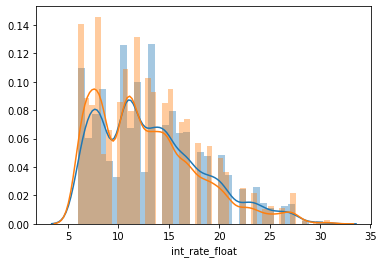

In [57]:
#plot it out
import seaborn as sns
sns.distplot(subordinates['int_rate_float'])
sns.distplot(managers['int_rate_float'])

In [58]:
#okay convert term column from string to int
print(df['term'].dtype)
df['term'].head()

object


0     36 months
1     36 months
2     60 months
3     36 months
4     36 months
Name: term, dtype: object

In [60]:
#okay its an object, lets see whats up with that object
dir(df.loc[0, 'term'])

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [67]:
#doesn't look particularly special.  So I think I'll just grab the class title, strip the words, and convert to an int
print(type(df.loc[0, 'term'].title()))
print(df.loc[0, 'term'].title())

<class 'str'>
 36 Months


In [68]:
#no nulls, so I think we can do this pretty easy
df['term'].isnull().sum()

0

In [70]:
def term_to_int(term):
  termint = term.title().strip(' Months')
  return int(termint)

#lets test it out
var = df.loc[0, 'term']

print(term_to_int(var))
print(type(term_to_int(var)))

36
<class 'int'>


In [71]:
#now lets apply it to the whole term column
df['term_int'] = df['term'].apply(term_to_int)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'settlement_percentage', 'settlement_term', 'int_rate_float',
       'emp_title_clean', 'emp_title_manager', 'issue_d_clean', 'year',
       'month', 'weekday', 'term_int'],
      dtype='object', length=152)

In [74]:
df[['term', 'term_int']].sample(10)

,term,term_int
62870,36 months,36
4006,36 months,36
3262,36 months,36
77198,36 months,36
22355,36 months,36
74840,60 months,60
35045,36 months,36
117006,36 months,36
85556,60 months,60
12491,36 months,36


In [76]:
#okay time to make a loan_status_is_great column with a 1 for loan_status being "Current" "Fully Paid", else 0.
df['loan_status'].head()

0    Fully Paid
1    Fully Paid
2       Current
3       Current
4       Current
Name: loan_status, dtype: object

In [83]:
#as I'm doing this, I'm re-evaluating some assumptions I made above.  I assumed that when 'term' returned as an object
#that it did not mean it was a string.  I'm going to leave my above code, because I got an answers, even if it was kinda
#round about.  Lesson learned! No silly calling .title() method.

print(type(df.loc[0, 'loan_status']))
print(type(df.loc[0, 'term']))

<class 'str'>
<class 'str'>


In [84]:
#lets check for any nans
df['loan_status'].isnull().sum()

0

In [86]:
df['loan_status'].value_counts(ascending = False, dropna = False).head(10)

Current               103062
Fully Paid             17784
Charged Off             3636
Late (31-120 days)      2617
In Grace Period          792
Late (16-30 days)        512
Default                    9
Name: loan_status, dtype: int64

In [87]:
#function for our new column, no nans, so we are going to be lazy and skip checking for them
def loan_status_eval(status):
  if (status == "Fully Paid") or (status == "Current"):
    return 1
  else:
    return 0

#lets test
test_d = ['Fully Paid', 'Current', 'robbed a bank']

for stuff in test_d:
  print(loan_status_eval(stuff))

1
1
0


In [88]:
df['loan_status_is_great'] = df['loan_status'].apply(loan_status_eval)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'settlement_term', 'int_rate_float', 'emp_title_clean',
       'emp_title_manager', 'issue_d_clean', 'year', 'month', 'weekday',
       'term_int', 'loan_status_is_great'],
      dtype='object', length=153)

In [91]:
#had to run it a few times since most loans statuses are great
df[['loan_status', 'loan_status_is_great']].sample(10)

,loan_status,loan_status_is_great
84797,Current,1
112616,Current,1
96278,Current,1
51310,Current,1
18271,Current,1
89571,Current,1
61762,Current,1
71411,Fully Paid,1
19778,Current,1
118313,Charged Off,0


In [92]:
#okay time to make the last_payment_d_month and last_payment_d_year columns
df['last_pymnt_d'].head()

0    Aug-2019
1    Jul-2019
2    Oct-2019
3    Oct-2019
4    Oct-2019
Name: last_pymnt_d, dtype: object

In [96]:
type(df.loc[0, 'last_pymnt_d'])

str

In [97]:
#ooooooooh, missing some info!
df['last_pymnt_d'].isnull().sum()

159

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01